In [11]:
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import scipy.stats as stats 

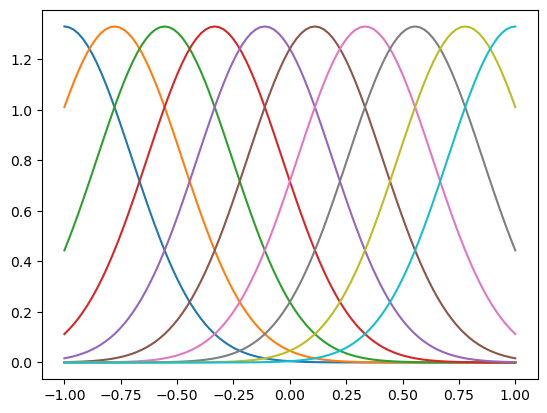

In [56]:
X = np.linspace(-1, 1, 10) 
for mu in X: 
    ran = np.linspace(-1, 1, 100) 
    plt.plot(ran, stats.norm.pdf(ran, mu, 0.3)) 
    
plt.savefig("Gaussian_basis_functions.png")

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X): 
        transformed_columns = []
        for mu in self.centers_: 
            transformed_columns.append(stats.norm.pdf(X, mu, self.width_))
        
        return np.hstack(tuple(transformed_columns))
    


In [95]:
class FourierFeatures(BaseEstimator, TransformerMixin): 
    "Fourier Expansion for one-dimensional input"
    
    def __init__(self, N): 
        self.N = N 
        
    def fit(self, X, Y=None): 
        return self
    
    def transform(self, X): 
        transformed_columns = [] 
        transformed_columns.append(np.ones(shape=X.shape))
        
        for n in range(self.N): 
            transformed_columns.append(np.sin(n * X))
            transformed_columns.append(np.cos(n * X))
            
        print(np.hstack(tuple(transformed_columns)).shape)
        return np.hstack(tuple(transformed_columns))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


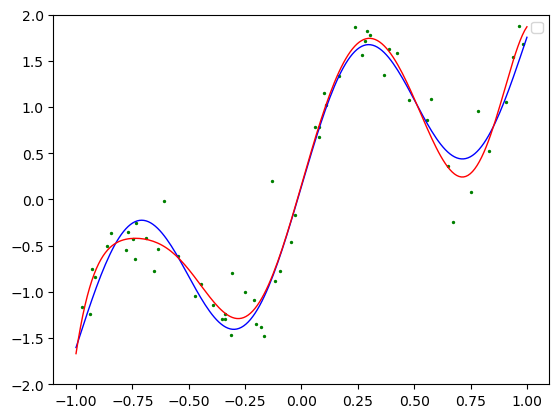

In [101]:
def true_func(X:np.array): 
    return np.sin(2 * np.pi * X) + 2 * np.cos(X - 1.5)

rang = np.linspace(-1, 1, 200) 

for _ in range(1): 
    
    N = 60
    X = np.random.uniform(-1, 1, size=(N, 1)) 
    Y = true_func(X) + np.random.normal(0, 0.3, size=(N, 1)) 
    
    model = Pipeline([("gauss_transform", GaussianFeatures(10)), 
                  ("lin_regression", LinearRegression())
                  ]) 
    model.fit(X, Y)

    plt.scatter(X, Y, c="g", s=2)
    plt.plot(rang, true_func(rang), c="b", linewidth=1)

    plt.plot(rang, model.predict(rang.reshape(-1, 1)).reshape(-1), linewidth=1, c="r")
plt.ylim((-2, 2))
plt.legend()
plt.savefig("Gaussian_Fit.png")
plt.show()